In [1]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from src.config import PROCESSED_DATA_DIR

input_test_path: Path = PROCESSED_DATA_DIR / "testset.csv"

df = pd.read_csv(str(input_test_path), index_col='id')
df.head()

2024-10-15 17:18:05.705 | INFO     | src.config:<module>:14 - PROJ_ROOT path is: G:\Work\DS\dont-bet-on-sports


,tm_spread,opp_spread,total,temperature,humidity_pct,wind_speed,week,tm_first_downs,tm_fourth_down_att,tm_fourth_down_conv,...,opp_location_N,tm_location_H,tm_location_N,week_day_Fri,week_day_Mon,week_day_Sat,week_day_Sun,week_day_Thu,week_day_Tue,week_day_Wed
id,,,,,,,,,,,,,,,,,,,,,
201910200nyg,-3.5,3.5,49.5,56.0,78.0,3.0,7,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
201910200gnb,-5.5,5.5,48.0,55.0,74.0,6.0,7,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
201910200oti,-3.0,3.0,42.5,77.0,40.0,2.0,7,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
201910200chi,-4.0,4.0,37.0,54.0,84.0,6.0,7,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
201910200sea,-3.0,3.0,49.0,50.0,79.0,8.0,7,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0


### Random Forest Regression

In [2]:
from src.modeling.predict import predict_random_forests

rfr_results = predict_random_forests(df.drop(columns=['r_spread']))

In [3]:
from sklearn.metrics import mean_absolute_error as mae 

rfr_mae = mae(df['r_spread'], rfr_results)
print(rfr_mae)

10.361411947245928


In [4]:
df_model = df.assign(pred = rfr_results)

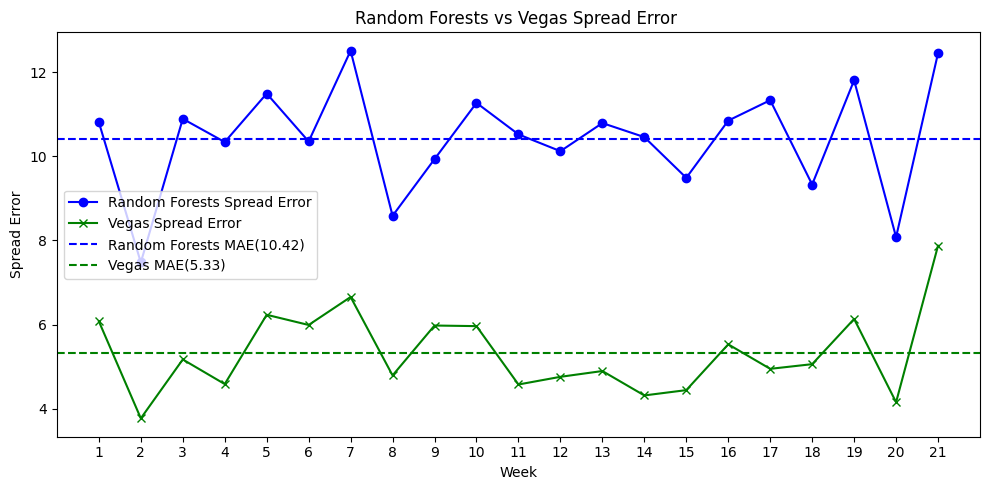

In [5]:
from src.plots import plot_error_w_vegas
plot_error_w_vegas(df_model, 'Random Forests')

### Support Vector Regression

In [7]:
from src.modeling.predict import predict_support_vectors

svr_results = predict_support_vectors(df.drop(columns=['r_spread']))

In [9]:
svr_mae = mae(df['r_spread'], svr_results)
print(svr_mae)

10.97565473150165


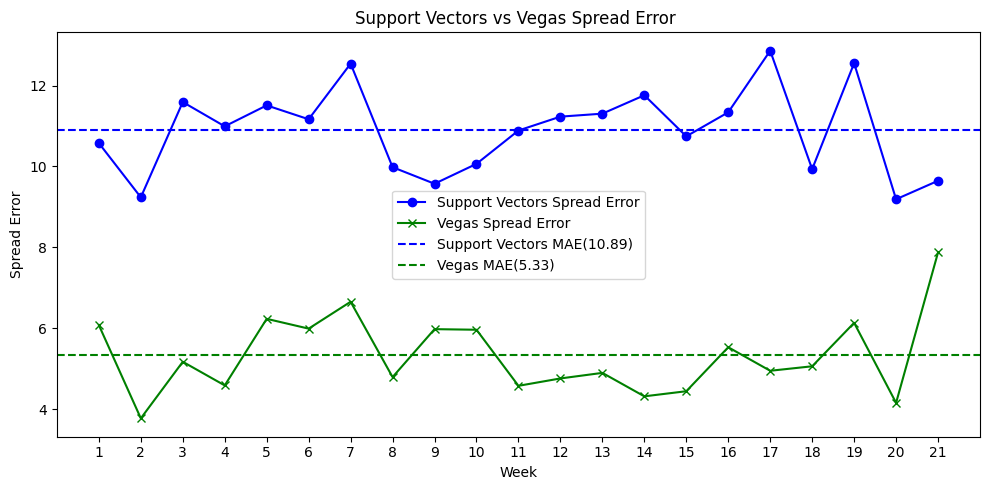

In [10]:
df_model = df.assign(pred = svr_results)
plot_error_w_vegas(df_model, 'Support Vectors')

### Gradient Boosted Trees

In [11]:
from src.modeling.predict import predict_gbt

gbt_results = predict_gbt(df.drop(columns=['r_spread']))
gbt_mae = mae(df['r_spread'], gbt_results)
print(gbt_mae)

11.955450046983822


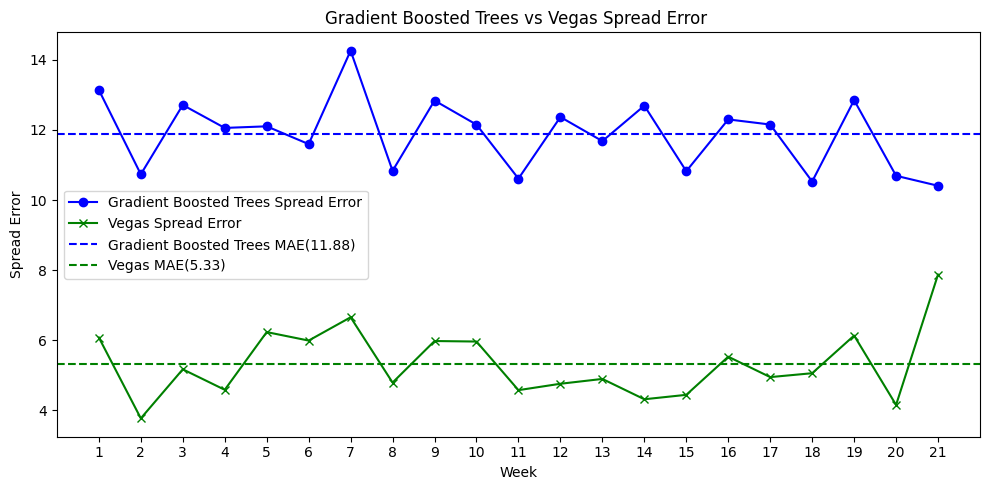

In [13]:
df_model = df.assign(pred = gbt_results)
plot_error_w_vegas(df_model, 'Gradient Boosted Trees')